# Parte 1: Carga, analisis, limpieza y transformacion de los datos

## Importacion de librerias

In [1]:
import numpy as np
np.random.seed(3301)
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Para usar KNN como clasificador
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Para usar Gaussian Naive Bayes como clasificador
from sklearn.naive_bayes import MultinomialNB

# Para evaluar cuales palabras son mas relevantes
from wordcloud import WordCloud

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


from collections import Counter
import re

In [176]:
#Descarga de listados de stopwords de la libreria nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Carga de datos

In [2]:
#Cargar los datos
df_opiniones = pd.read_csv('MovieReviews.csv', sep=',', encoding = 'utf-8', index_col=0)
df_opiniones.index.name="id"
df_pruebas = pd.read_csv('MovieReviewsPruebas.csv', sep=',', encoding = 'utf-8', index_col=0)
#Numero de datos y de columnas que poseen los datos dados
df_opiniones.head()

,review_es,sentimiento
id,,
0,Si está buscando una película de guerra típica...,positivo
1,Supongo que algunos directores de películas de...,positivo
2,Es difícil contarle más sobre esta película si...,positivo
3,"La película comienza muy lentamente, con el es...",positivo
4,Esta película es verdadera acción en su máxima...,positivo


In [3]:
df_opiniones.describe()

,review_es,sentimiento
count,5000,5000
unique,4998,2
top,"Después de ver a Meredith en ""Más allá de la p...",positivo
freq,2,2500


## Diccionario del caso

In [4]:
diccionario = pd.read_excel("DiccionarioPeliculas.xlsx")
diccionario

,Campo,Tipo,Descripción
0,id,integer,id de la revisión
1,review_es,text,Revisión en español
2,sentimiento,text,Sentimiento asociado a la película: Negativo-p...


## Analisis preliminar de los datos

<Axes: ylabel='sentimiento'>

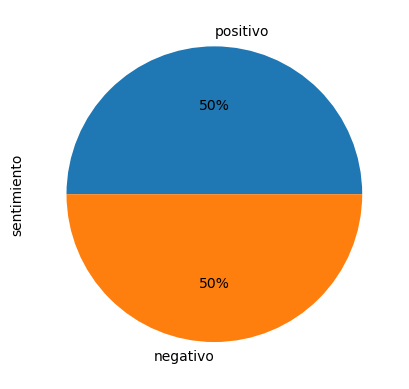

In [5]:
#Grafico circular para visualizar la distribucion de opiniones positivas y negativas
df_opiniones.sentimiento.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: >

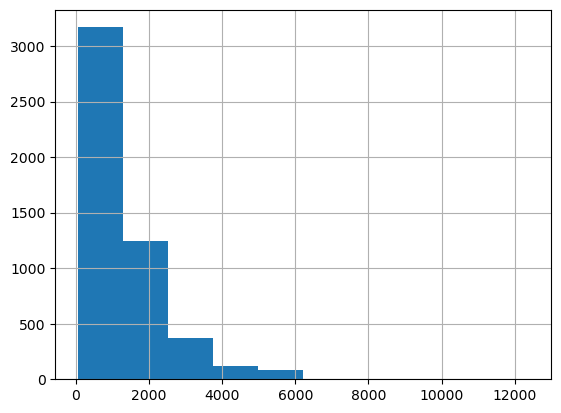

In [6]:
df_opiniones['review_es'].str.len().hist()

In [7]:
#Recuento de palabras mas comunes, se puede observar que la mayoria de ellas son palabras que podrian considerarse stopwords o palabras que no aportan al analisis textual
Counter(" ".join(df_opiniones["review_es"]).split()).most_common(20)#[:-50-1:-1]

[('de', 63856),
 ('que', 36188),
 ('la', 34760),
 ('y', 26879),
 ('en', 25251),
 ('a', 20734),
 ('el', 19636),
 ('un', 17788),
 ('es', 16077),
 ('una', 15773),
 ('los', 13193),
 ('se', 12130),
 ('no', 11373),
 ('película', 11003),
 ('para', 8935),
 ('con', 8544),
 ('lo', 8412),
 ('su', 8169),
 ('las', 8090),
 ('por', 7823)]

In [8]:
#Recuento de palabras menos comunes, se puede observar que las que pertenecen a esta categoria tienen algun error o son dos palabras con un punto en medio
Counter(" ".join(df_opiniones["review_es"]).split()).most_common()[:-20-1:-1]

[('hija.Con', 1),
 ('felicidad.En', 1),
 ('Teer)', 1),
 ('(Mc', 1),
 ('Generally,', 1),
 ('bump', 1),
 ('schlock', 1),
 ('late-hour', 1),
 ('wee', 1),
 ('TV-movie', 1),
 ('película".Lástima', 1),
 ('ansiedad.Supongo', 1),
 ('mejoraría', 1),
 ('a.movies', 1),
 ('disco.Si', 1),
 ('turn).', 1),
 ('(sans', 1),
 ('D.V.Pero', 1),
 ('inconsciente.No', 1),
 ('cine.Pero', 1)]

In [9]:
#Definicion de objetos para eliminar stopwords, eliminar texto sin sentido, realizar stemming y tokenizar
stopwords = stopwords.words('spanish')
stemmer = SnowballStemmer('spanish')
#max_features indica cual es el numero maximo de palabras que se quiere usar, en este caso se usaran las 2500 mas comunes, min_df indica el numero minimo de documentos en los que debe aparecer la palabra
#y max_df indica que no se escogeran palabras que aparezcan en mas del 80% de documentos
vectorizador = TfidfVectorizer(max_features=2500,min_df=7, max_df=0.8)

In [10]:
#Eliminacion de las stopwords, signos de puntuacion, conversion de mayuscula a minuscula y stemming de las palabras
def preprocesamiento(texto):
    resultado = []
    #Se elimina todo lo que no sean letras del alfabeto y se reemplaza por espacio
    solo_letras = re.sub("[^a-zA-Záéíóúäëïöü]", " ", texto)
    palabras = solo_letras.lower().split()
    for palabra in palabras:
        if palabra not in stopwords:
            #if palabra in manywords:
            palabra = stemmer.stem(palabra)
            resultado.append(palabra)
    return " ".join(resultado)

In [11]:
#Resultado del proceso anterior
df_opiniones['review_es'] = df_opiniones['review_es'].apply(preprocesamiento)  
df_opiniones.head()

,review_es,sentimiento
id,,
0,si busc pelicul guerr tipic asi not aficion gu...,positivo
1,supong director pelicul luj sent busc abrig gr...,positivo
2,dificil cont pelicul estrop disfrut esper vien...,positivo
3,pelicul comienz lent estil vid wallac napalm a...,positivo
4,pelicul verdader accion maxim expresion mejor ...,positivo


In [17]:
#Se eliminan palabras que aparezcan 10 veces o menos a lo largo de todos los documentos, se muestran las palbras que aparecen 11 veces
copia = df_opiniones.copy()
c = Counter(word for x in copia['review_es'] for word in x.split())
copia['review_es'] = [' '.join(y for y in x.split() if c[y] > 10) for x in copia['review_es']]
Counter(" ".join(copia["review_es"]).split()).most_common()[:-50-1:-1]

[('grams', 11),
 ('zoey', 11),
 ('concord', 11),
 ('varm', 11),
 ('damm', 11),
 ('rasc', 11),
 ('mccab', 11),
 ('humans', 11),
 ('lennon', 11),
 ('perpetu', 11),
 ('segal', 11),
 ('mediant', 11),
 ('cuidador', 11),
 ('nathaniel', 11),
 ('mass', 11),
 ('rush', 11),
 ('carlyl', 11),
 ('glorific', 11),
 ('mans', 11),
 ('antolog', 11),
 ('tedi', 11),
 ('flesh', 11),
 ('andi', 11),
 ('movil', 11),
 ('matanz', 11),
 ('blaxplon', 11),
 ('fest', 11),
 ('escol', 11),
 ('forward', 11),
 ('plenty', 11),
 ('garfield', 11),
 ('tamur', 11),
 ('teenag', 11),
 ('coloni', 11),
 ('natur', 11),
 ('cuantic', 11),
 ('bey', 11),
 ('storylin', 11),
 ('ambigu', 11),
 ('tweety', 11),
 ('sarcasm', 11),
 ('superb', 11),
 ('sic', 11),
 ('goldblum', 11),
 ('olsen', 11),
 ('desord', 11),
 ('inexactitud', 11),
 ('willem', 11),
 ('lean', 11),
 ('mot', 11)]

In [18]:
text = " ".join(review for review in copia.review_es)

In [19]:
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3440440 words in the combination of all review.


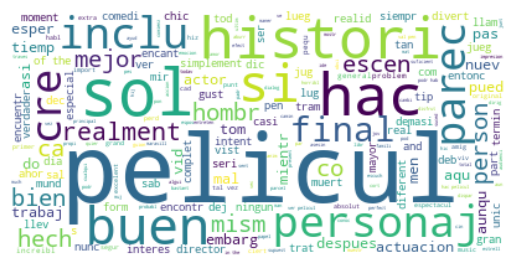

In [20]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
tfidf_wm = vectorizador.fit_transform(copia["review_es"])
df_final = pd.DataFrame(data = tfidf_wm.toarray(),index = copia.index,columns = vectorizador.get_feature_names_out())
df_final.head()

,abaj,abandon,abiert,able,abog,abord,about,abre,abrum,absolut,...,xx,year,years,yet,york,you,young,your,zombi,zon
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Se crea el conjunto de datos de la variable objetivo
X = df_final
X.shape

(5000, 2500)

In [23]:
# Se selecciona la variable objetivo
Y = copia['sentimiento']
Y.shape

(5000,)

### SVM

#### Implementado por Daniel Bernal

In [24]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)


In [25]:
# Crear el modelo SVM
clf = svm.SVC(kernel='linear', C=1, gamma='auto')

In [26]:
# Entrenar el modelo
clf.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [27]:
#Evaluacion del modelo:
print("Puntuacion de entrenamiento: %f" % clf.score(X_train, y_train))
print("Puntuación de prueba: %f" % clf.score(X_test, y_test))

Puntuacion de entrenamiento: 0.939333
Puntuación de prueba: 0.837000


In [28]:
# Predecir los valores en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = clf.score(X_test, y_test)
print('Precisión:', accuracy)

Precisión: 0.837


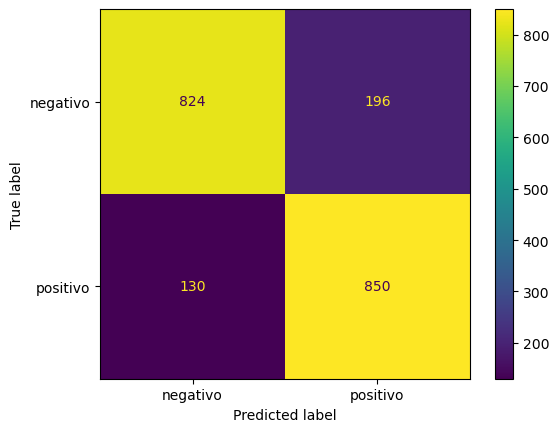

In [29]:
# Se genera la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Metodo Multinomial Naive Bayes

#### Implementado por Leandro Yara

In [30]:
# Se dividen los datos de entrenamiento y de test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1, stratify=Y, shuffle=True)

In [31]:
# Se crea el modelo y se hace el fit con los datos de entrenamiento
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [32]:
#Evaluacion del modelo:
print("Puntuacion de entrenamiento: %f" % nb.score(X_train, Y_train))
print("Puntuación de prueba: %f" % nb.score(X_test, Y_test))

Puntuacion de entrenamiento: 0.876286
Puntuación de prueba: 0.832667


In [33]:
# Se predicen los resultados del conjunto de prueba
Y_pred = nb.predict(X_test)

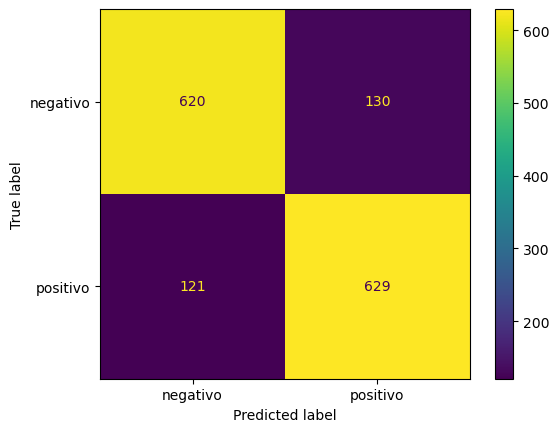

In [34]:
# Se genera la matriz de confusión
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

In [35]:
print("Numero de registros mal clasificados entre %d registros : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

Numero de registros mal clasificados entre 1500 registros : 251


### Método KNN

#### Implementado por Mateo Lopez

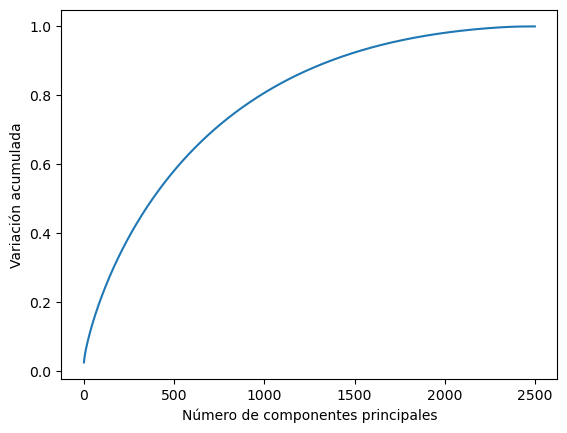

In [36]:
#Se implementa PCA para eliminar caracteristicas que no esten aportando informacion a los datos
df_pca = df_final.copy()
pca = PCA()
pca.fit(df_pca)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación acumulada')
plt.show()

In [37]:
#Se observa que hacia los 1750 componentes se explica casi la totalidad de la varianza, por lo que se escoge este valor
pca = PCA(n_components=1750)
transformados = pca.fit_transform(df_pca)
df_pca = pd.DataFrame(
    data=transformados, 
    columns=['PC'+str(x) for x in range(1750)])
pd.concat([df_pca, Y], axis=1)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1741,PC1742,PC1743,PC1744,PC1745,PC1746,PC1747,PC1748,PC1749,sentimiento
0,-0.023374,-0.006516,0.029064,-0.024808,0.032343,-0.067579,-0.004998,-0.033205,0.051080,0.060085,...,-0.003083,-0.008715,-0.006577,-0.013405,0.010230,-0.002981,0.016180,0.010790,-0.006887,positivo
1,-0.052348,-0.003379,-0.027952,0.020073,0.063046,-0.048675,-0.032943,-0.067391,-0.063691,-0.060707,...,-0.005890,0.008901,-0.015720,0.010088,-0.000435,-0.005106,-0.001744,-0.006974,-0.005374,positivo
2,-0.011132,-0.061535,0.032422,-0.043607,-0.009686,-0.008858,-0.000811,-0.018853,-0.005894,-0.027902,...,0.015437,-0.002265,0.010746,-0.002087,-0.003549,-0.001730,-0.003503,-0.003789,0.004303,positivo
3,0.001617,-0.098052,0.042571,-0.032404,-0.072845,0.005099,-0.004546,0.020640,0.021114,0.007019,...,0.004593,-0.007139,-0.007142,0.003488,-0.004197,0.006953,-0.005319,0.019899,0.005397,positivo
4,-0.036537,0.050642,0.049290,-0.034987,-0.014523,0.029720,0.048423,0.011945,0.042458,-0.049849,...,-0.015615,0.011658,-0.005133,-0.004551,-0.020508,-0.010494,0.022676,0.010339,-0.009117,positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.020628,-0.042429,0.010162,-0.040781,-0.013238,0.045466,0.053605,0.035355,-0.070330,0.081215,...,0.005672,-0.003153,0.007642,-0.002434,0.004133,0.023211,0.001746,-0.002979,0.003534,negativo
4996,-0.019642,0.097096,0.057010,-0.069577,-0.020064,-0.044781,0.019364,-0.015990,0.024641,-0.016211,...,0.001766,0.001070,-0.020047,-0.015634,0.013723,0.001197,-0.011729,-0.008241,0.016225,negativo
4997,-0.035764,0.029932,0.014907,-0.013944,0.008796,-0.094053,-0.037186,0.028834,-0.023114,-0.071213,...,0.001036,-0.001741,-0.010035,0.001713,-0.006401,-0.002075,0.004919,-0.006183,0.006139,negativo
4998,0.446019,-0.031170,0.064815,-0.022108,-0.016922,-0.016314,-0.009134,0.013655,0.004919,0.017929,...,-0.011595,-0.020930,0.002191,0.000110,0.002667,0.013601,-0.005479,-0.010583,0.036429,negativo


Minimum error:- 0.2255 at K = 38


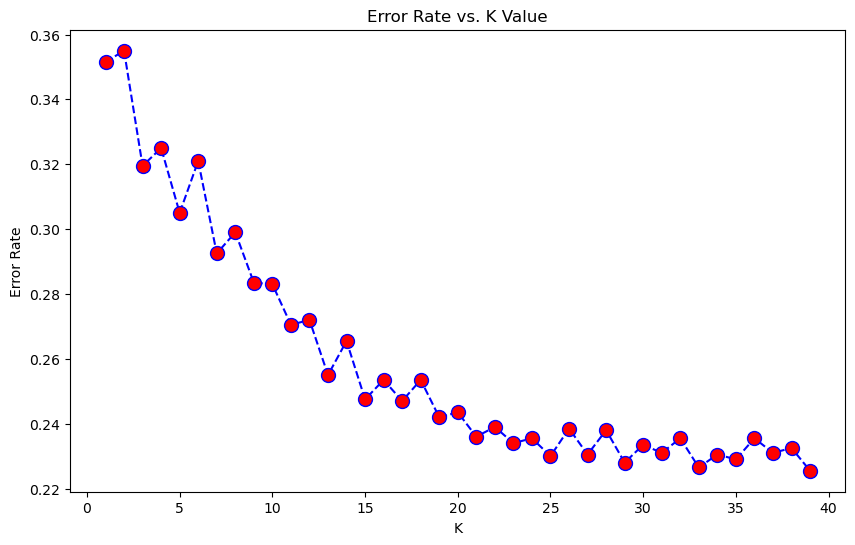

In [38]:
#df_pca = df_pca.drop('sentimiento', axis=1)
error_rate = []
X_train, X_test, y_train, y_test = train_test_split(df_pca, Y, test_size=0.4, random_state=0, shuffle=True)
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Text(0, 0.5, 'Accuracy Score')

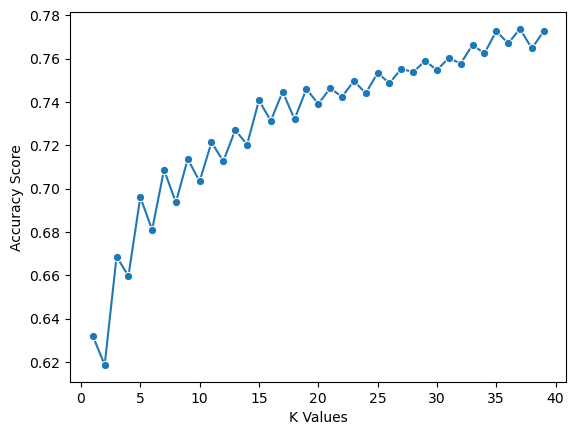

In [39]:
#Grafico para visualizar en que valor de k se obtiene la precision mas alta, se puede ver que coincide con el grafico del error
scores = []
k_values = [i for i in range (1,40)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [40]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7675
